### <span id="0">Computer-exam BFVM23DATASC5 - Supervised Learning</span>

# 2024-2025 - first opportunity, Mon. 04 Nov 2025, 12:30-16:30, ZP11/H1.86

Take a minute to read the following instructions and information.

## Materials

On BlackBoard you will find a zip-file containing the following materials:

* this exam `BFVM23DATASC5_T_DataScience5_SupervisedLearning_2425_DSLS_KRPE-LADR.ipynb` (also as `*.pdf`);
* data files:
  * `cheminformatics_data.csv`
  * `codebook.csv`

## Instructions

This is an open book exam that you take on school workstations using your own account. You are allowed to use any materials in your home folder, look up information on the internet, as well as consult any written materials. However, you are **not** allowed to utilize your own devices (e.g. telephone or laptop) or use online communication media or AI-tools (e.g. chat and ChatGPT); this will be considered fraud. You are allowed to leave the room for toilet or coffee breaks, except during the first and last hour of the scheduled exam time. You are not permitted to confer with fellow students about code.

This exam consists of the following parts:

1. **<a href="#1">Part I</a>**

2. **<a href="#2">Part II</a>**

3. **<a href="#3">Part III</a>**

4. **<a href="#4">Part IV</a>**

Each part directs you to perform a particular supervised-machine learning analysis. If you do not understand what is meant, you may ask the exam's supervisor for clarification. Execute the analysis that is requested, and use your own judgement to perform any steps that you deem necessary. **Do not only provide code solutions, but explain by means of comments and/or text markup why you perform steps, as well as what you conclude from the output of an analysis!**

The various parts can be answered separately; if you are unable to (fully) solve one part, an explanation of your intended solution in the form of text or pseudo-code may be awarded partial credit. You can always continue to a next part. Save your notebook regularly to avoid inadvertent loss of your progress!

## Assessment

All parts have the possible number of points to be scored indicated above. Your grade will be calculated as follows:

$$
\text{Grade} = 1 + 9 \cdot \frac {\text{Points Scored}} {\text{Maximum Score}}
$$

* 40 % of your grade is based on the insightfulness of provided explanations, motivations, interpretations, and conclusions drawn from your analyses.

* 40 % of your grade is based on the correctness, completeness, efficiency, and intelligibility of the code(*) that you produce.

* 20 % of your grade is based on whether or not you use your own classes, developed during the course.


Instructions on how to submit your answers after you finish are provided at the very <a href="#X">bottom</a>.

***

## Data

For a series of almost 1700 molecules their activity against a human Glucocorticoid receptor was measures as IC50 concentrations (in nM). This is the concentration at which the compound is still 50% effective, so lower is more potent. 
For each of these molecules 201 features were derived from their chemical structure. In addition, for each molecule a 1024 bit fingerprint was calculated resulting in, in total, 1225 features per molecule.

The dataset contains 3 targets you will be predicting:
1) The IC50 value (`standard_value`)
2) Whether the IC50 value is < 1000 nM (`is_active`)
3) Whether the molecule satisfies Lipinski's "rule of 5" (`lipinski`)

The codebook describes for each column in the data (`variable`) what it contains (`label`), the units (`units`), what type of variable it is (`type`), and a reference where you can find more information about the feature (`reference`). All of these are provided at a "best effort"-basis; the codebook is incomplete and could be wrong in places... Some of the features are easy to interpret, others are more abstract. All fingerprint features are booleans. The feature names are formatted as `fp{idx}` with `idx` running from `0` to `1024` (non inclusive) and are omitted from the codebook.

The `type` can have 4 values:
- nominal: for nominal variables
- ratio: for ratio variables
- bool: for boolean variables
- count: for variables with non-negative integer values

For more information on the features, see the codebook and/or https://deepmol.readthedocs.io/en/stable/deepmol_docs/featurization.html#d-1d-and-2d-descriptors. For more information on the fingerprints, see https://www.rdkit.org/docs/GettingStartedInPython.html#feature-definitions-used-in-the-morgan-fingerprints and/or https://dx.doi.org/10.1021/ci100050t


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cheminformatics_data.csv')
codebook = pd.read_csv('codebook.csv', index_col=False)

In [3]:
data

,molecule_chembl_id,standard_value,lipinski,is_active,canonical_smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fp1014,fp1015,fp1016,fp1017,fp1018,fp1019,fp1020,fp1021,fp1022,fp1023
0,CHEMBL134277,100.0,False,True,CC1=CC(C)(C)Nc2ccc3c(c21)/C(=C/c1ccsc1)Oc1ccc(...,15.158941,15.158941,0.277125,-3.859397,0.481256,...,1,0,0,0,0,0,0,0,0,0
1,CHEMBL415524,77.0,False,True,CCc1ccccc1/C=C1\Oc2ccc(F)cc2-c2ccc3c(c21)C(C)=...,15.415673,15.415673,0.407112,-3.996804,0.469857,...,1,0,0,0,0,0,0,0,0,0
2,CHEMBL336353,320.0,False,True,CC1=CC(C)(C)Nc2ccc3c(c21)/C(=C/c1ccccc1N(C)C)O...,15.467937,15.467937,0.423251,-4.017487,0.474812,...,1,0,0,0,0,0,0,0,0,0
3,CHEMBL413309,250.0,False,True,CC1=CC(C)(C)Nc2ccc3c(c21)/C(=C/c1ccccc1)Oc1c(F...,15.763427,15.763427,0.326528,-3.909144,0.488806,...,1,0,0,0,0,0,0,0,0,0
4,CHEMBL717,10.0,True,True,CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4...,14.561580,14.561580,2.545120,-6.060854,0.647973,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,CHEMBL5282323,6960.0,False,False,COc1cc(C)c(Cl)cc1S(=O)(=O)Nc1ccc2c(c1)CCCN2C(=...,14.344989,14.344989,0.429853,-6.079389,0.535937,...,0,0,0,0,0,0,0,1,0,0
1685,CHEMBL5266323,2070.0,False,False,COc1cc(C)c(Cl)cc1S(=O)(=O)Nc1ccc2c(c1)CCCN2C(=...,14.088936,14.088936,0.350488,-6.056378,0.482584,...,0,0,0,0,0,0,0,0,0,0
1686,CHEMBL5269021,2220.0,False,False,COc1cc(C)c(Cl)cc1S(=O)(=O)Nc1ccc2c(c1)CCCN2C(=...,14.090200,14.090200,0.573348,-6.147867,0.427672,...,0,0,0,0,0,1,0,0,0,0
1687,CHEMBL5272312,3430.0,False,False,COc1ccc(C(=O)N2CCCc3cc(NS(=O)(=O)c4cc(Cl)c(C)c...,14.499154,14.499154,0.521061,-6.162963,0.458223,...,0,0,0,0,0,0,0,0,0,0


In [4]:
codebook

,variable,label,units,type,reference
0,molecule_chembl_id,Molecule identifier,NaN,nominal,NaN
1,standard_value,IC50 activity against Glucocorticoid receptor,nM,ratio,NaN
2,lipinski,Whether the molecule satisfies Lipinski's rule...,NaN,bool,NaN
3,is_active,Whether the standard_value is less than 1000 nM,NaN,bool,NaN
4,canonical_smiles,A SMILES string representing the molecule,NaN,nominal,NaN
...,...,...,...,...,...
201,fr_thiazole,Number of thiazole rings,NaN,count,NaN
202,fr_thiocyan,Number of thiocyanates,NaN,count,NaN
203,fr_thiophene,Number of thiophene rings,NaN,count,NaN
204,fr_unbrch_alkane,Number of unbranched alkanes of at least 4 mem...,NaN,count,NaN


In [5]:
TARGETS = ['standard_value', 'lipinski', 'is_active']
IDENTIFIERS = ['molecule_chembl_id', 'canonical_smiles']
FINGERPRINT_COLUMNS = [f'fp{idx}' for idx in range(1024)]
FEATURE_COLUMNS = [c for c in codebook['variable'] if c not in TARGETS+IDENTIFIERS]

<a id="1" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part I

In this part you will predict the `is_active` target, and see how informative the fingerprint is. **In all following questions, explain why you perform steps, why you picked specific models, as well as what you conclude from the output.**

1) Train and validate a model to predict the `is_active` column using the columns in `FEATURE_COLUMNS` (or a subset thereof)
2) Train and validate a model to predict the `is_active` column using the columns in `FINGERPRINT_COLUMNS` (or a subset thereof)
3) Train and validate a model to predict the `is_active` column using the columns in both `FEATURE_COLUMNS` and `FINGERPRINT_COLUMNS` (or a subset thereof)
4) Is fingerprinting useful?

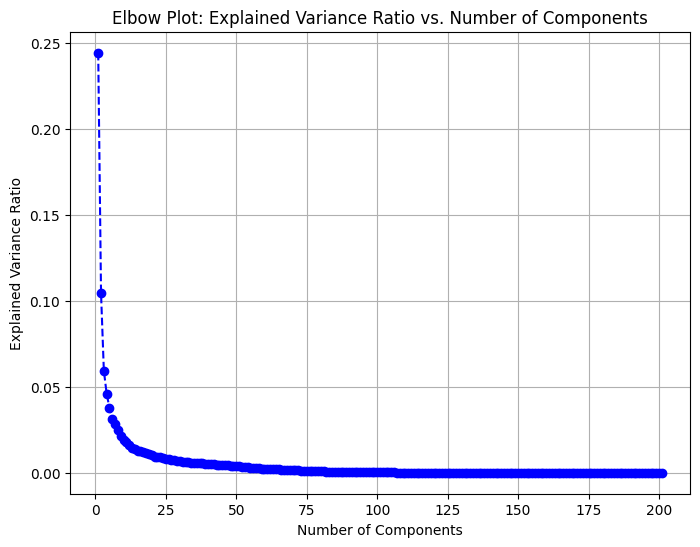

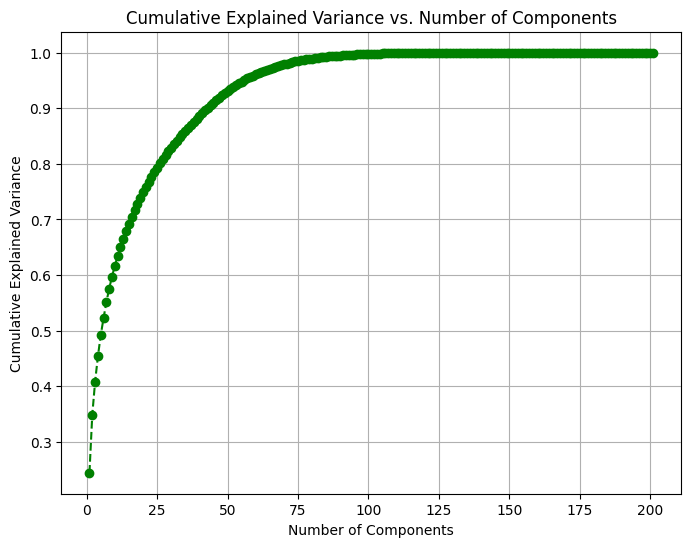


Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1082
           1       0.82      0.80      0.81      1082

    accuracy                           0.81      2164
   macro avg       0.81      0.81      0.81      2164
weighted avg       0.81      0.81      0.81      2164


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.48      0.68      0.56        73
           1       0.90      0.79      0.84       265

    accuracy                           0.77       338
   macro avg       0.69      0.74      0.70       338
weighted avg       0.81      0.77      0.78       338

Confusion Matrix on Test Set:
[[ 50  23]
 [ 55 210]]


In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Prepare data
X = data[FEATURE_COLUMNS]
y = data['is_active'].astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Upsample minority class in training data
smote = SMOTE(random_state=42, k_neighbors=10) # K can be adjusted, becuase there are 342 class0  before upsampled
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standard scaling and PCA for explained variance plot
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to scaled training data and plot explained variance
pca = PCA().fit(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Elbow plot to see individual explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Elbow Plot: Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative explained variance plot
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='g')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Choose 90% explained variance
# for this case, there are 200+ features, so we can use 100% features, the accurancy will be better,

# Besause there are numerical and binary features, I apply Logisticregression here 
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),  # Adjust to capture 90% of variance, 
    ('classifier', LogisticRegression(random_state=42, max_iter=3000))
])

# Fit the pipeline on the training data and predict
pipeline.fit(X_train, y_train)
y_predict_train = pipeline.predict(X_train)

print("\nClassification Report on Training Set:")
print(classification_report(y_train, y_predict_train))

# Evaluate on test set
y_pred = pipeline.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))


### About PCA:"
Here’s what a high accuracy on both training and test data could mean in this context:

Possible Overfitting:

If your model has high accuracy on both the training and test sets, it might be that your data is inherently easy to classify with the given features. However, this could also mean that the model has memorized the patterns in the training data without capturing generalizable patterns.
When you have many features relative to your sample size, especially if there are redundant or irrelevant features, the model can easily overfit. High test accuracy can sometimes be misleading, as it might not generalize well to entirely new data.
Redundant or Non-Informative Features:

Without dimensionality reduction, having all 200 features might introduce noise or redundancy. These can negatively impact the model's interpretability and increase computational complexity, though they might not immediately reduce accuracy.
If the features have high multicollinearity (where features are highly correlated with each other), the model might still achieve high accuracy but rely heavily on the correlated features rather than capturing more subtle patterns.
PCA’s Role in Reducing Overfitting and Improving Generalizability:

PCA helps in reducing the number of features by retaining only the most important components. This often leads to a simpler model that generalizes better and can avoid overfitting.
By only keeping a subset of components (say, those explaining 90% of the variance), you reduce the chance of the model learning noise or irrelevant patterns, which often improves performance on unseen data.

In [7]:
# YOUR ANSWER GOES HERE
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# for question 1:
X = data[FEATURE_COLUMNS]
#mapping = {'Flase': 0, 'True': 1}
y = data['is_active'].astype(int)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# should first split the data, then upsample, just in case of data linkage
#####################
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)

# is unbalance data, so I upsample the 0 class by smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=10)  
X_train, y_train = smote.fit_resample(X_train, y_train)

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")
#####################
    

# there are 200+ features , so here i apply to PCA , and use 0.90 to capture 90% of the variance
# here need to plot PCA to see how many features to keep
# Get the PCA model from the pipeline


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('classifier', LogisticRegression(random_state=42, max_iter=3000))
])
pipeline.fit(X_train,y_train)
y_predict_train = pipeline.predict(X_train)
print("\nClassification Report at train set:")
print(classification_report(y_train, y_predict_train))

y_pred = pipeline.predict(X_test)

print("\nClassification Report at test set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



is_active
1    1347
0     342
Name: count, dtype: int64

Train data class distribution after SMOTE upsample:
Class 0: 1082 samples
Class 1: 1082 samples

Classification Report at train set:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1082
           1       0.89      0.87      0.88      1082

    accuracy                           0.88      2164
   macro avg       0.88      0.88      0.88      2164
weighted avg       0.88      0.88      0.88      2164


Classification Report at test set:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        73
           1       0.93      0.88      0.90       265

    accuracy                           0.85       338
   macro avg       0.78      0.82      0.80       338
weighted avg       0.86      0.85      0.86       338

Confusion Matrix:
[[ 55  18]
 [ 32 233]]


is_active
1    1347
0     342
Name: count, dtype: int64

Train data class distribution after SMOTE upsample:
Class 0: 1082 samples
Class 1: 1082 samples


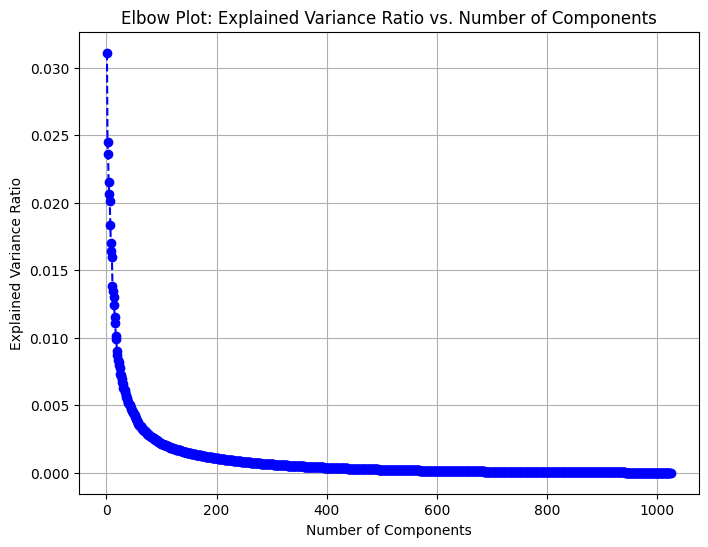

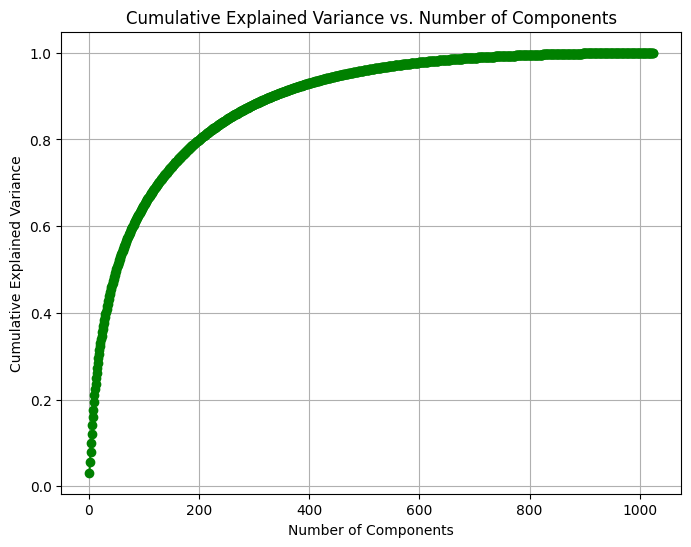


Classification Report at train set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1082
           1       0.99      0.99      0.99      1082

    accuracy                           0.99      2164
   macro avg       0.99      0.99      0.99      2164
weighted avg       0.99      0.99      0.99      2164


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        73
           1       0.89      0.92      0.91       265

    accuracy                           0.85       338
   macro avg       0.78      0.75      0.76       338
weighted avg       0.84      0.85      0.84       338

Confusion Matrix:
[[ 42  31]
 [ 20 245]]


In [8]:
# for question 2:
X = data[FINGERPRINT_COLUMNS]
#mapping = {'Flase': 0, 'True': 1}
y = data['is_active'].astype(int)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###########################
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)

# is unbalance data, so I upsample the 0 class by smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=10)  
X_train, y_train = smote.fit_resample(X_train, y_train)

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")
#########################    

# Standard scaling and PCA for explained variance plot
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to scaled training data and plot explained variance
pca = PCA().fit(X_train_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Elbow plot to see individual explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Elbow Plot: Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative explained variance plot
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='g')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
    
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=0.90)),
    ('classifier', LogisticRegression(random_state=42, max_iter=3000))
])
pipeline.fit(X_train,y_train)
y_predict_train = pipeline.predict(X_train)
print("\nClassification Report at train set:")
print(classification_report(y_train, y_predict_train))

y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [9]:
# for question 3:
X = data[FINGERPRINT_COLUMNS + FEATURE_COLUMNS]
#mapping = {'Flase': 0, 'True': 1}
y = data['is_active'].astype(int)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca',PCA(n_components=0.90)),
    ('classifier', LogisticRegression(random_state=42, max_iter=3000))
])

###########################
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)

# is unbalance data, so I upsample the 0 class by smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=10)  
X_train, y_train = smote.fit_resample(X_train, y_train)

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")
#########################   


pipeline.fit(X_train,y_train)
y_predict_train = pipeline.predict(X_train)
print("\nClassification Report at train set:")
print(classification_report(y_train, y_predict_train))

y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

is_active
1    1347
0     342
Name: count, dtype: int64

Train data class distribution after SMOTE upsample:
Class 0: 1082 samples
Class 1: 1082 samples

Classification Report at train set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1082
           1       0.99      1.00      0.99      1082

    accuracy                           0.99      2164
   macro avg       0.99      0.99      0.99      2164
weighted avg       0.99      0.99      0.99      2164


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.62        73
           1       0.89      0.92      0.91       265

    accuracy                           0.85       338
   macro avg       0.78      0.75      0.76       338
weighted avg       0.84      0.85      0.84       338

Confusion Matrix:
[[ 42  31]
 [ 20 245]]


In [10]:
# The fingerprinting is usefull apprently! Without the features, the arrcucy is low in Logisticregression. at 0.77 , 
# When use dingerpringting is 0.85 ar text set, at the train set is 0.99.

<a id="2" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part II

In this part you will predict the `lipinski` target. This column is actually derived from 4 columns in `FEATURE_COLUMNS` (`NumHDonors`, `NumHAcceptors`, `MolWt`, and `MolLogP`). Each of these columns was compared to a threshold, and if all 4 features were less than their threshold the molecule satisfies the Lipinski rule-of-5. 
**In all following questions, explain why you perform steps, why you picked specific models, as well as what you conclude from the output.**

1) What kind of model could reproduce this behaviour?
2) Train and validate such a model to find the used threshold values.
3) Train and validate a model to predict the `lipinski` column using the columns in `FEATURE_COLUMNS`, *except* `NumHDonors`, `NumHAcceptors`, `MolWt`, and `MolLogP`. Can you say something about which features are most important now?
3) Train and validate a model to predict the `lipinski` column using the columns in `FINGERPRINT_COLUMNS`

In [19]:
# YOUR ANSWER GOES HERE
from sklearn.tree import DecisionTreeClassifier

############Q1
print("decisiontree could reproduce this behaviour.")

#############Q2
y = data['lipinski'].astype(int)
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)
X = data[['NumHDonors','NumHAcceptors','MolWt','MolLogP']]
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

############### upsample by smote######
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)

# is unbalance data, so I upsample the 0 class by smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=10)  
X_train, y_train = smote.fit_resample(X_train, y_train)

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")
#######################################

# there are 4 features, no need PCA, and Becuse we need to find what is the best features, 
# so DecisionTree Classifier can do this
pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42))
])
pipeline.fit(X_train,y_train)
y_predict_train = pipeline.predict(X_train)
print("\nClassification Report at train set:")
print(classification_report(y_train, y_predict_train))

y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

criteria = {
    'gini':      lambda p: 1.0 - np.sum(p ** 2),
    'entropy':   lambda p: np.sum(-p * np.log2(np.maximum(p, 1e-100)))
}

y_train = np.array(y_train)
classes = np.unique(y_train)
y_onehot_train = (y_train[:, np.newaxis] == classes)


def determine_split(X, y_onehot, *, criterion='entropy'):
    '''Determine an optimal split feature and threshold from training data.'''
    cost_function = criteria[criterion]
    best_feature = best_threshold = None
    best_cost = cost_function(y_onehot.mean(axis=0))
    for feature in range(X.shape[1]):
        ordered = np.unique(X[:, feature])
        for threshold in (ordered[:-1] + ordered[1:]) / 2.0:
            subset = (X[:, feature] <= threshold)
            fraction = subset.mean()
            cost =        fraction  * cost_function(y_onehot[ subset, :].mean(axis=0)) \
                 + (1.0 - fraction) * cost_function(y_onehot[~subset, :].mean(axis=0))
            if cost < best_cost:
                best_feature, best_threshold, best_cost = feature, threshold, cost
    return best_feature, best_threshold

best_feature, best_threshold = determine_split(X_train, y_onehot_train, criterion='entropy')
print("\nBest Feature for Split:", best_feature)
print("Best Threshold for Split:", best_threshold)

decisiontree could reproduce this behaviour.
lipinski
0    1059
1     630
Name: count, dtype: int64
lipinski
0    1059
1     630
Name: count, dtype: int64

Train data class distribution after SMOTE upsample:
Class 0: 840 samples
Class 1: 840 samples

Classification Report at train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       119

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338

Confusion Matrix:
[[219   0]
 [  0 

#### Q2 100% accuracy at train data, and 100% at the test data, means it is a good model.

In [ ]:
exclude_columns = ['NumHDonors','NumHAcceptors','MolWt','MolLogP']
filtered_cols = [cols for cols in FEATURE_COLUMNS  if cols not in exclude_columns]
X = data[filtered_cols]
X = np.array(X)

y = data['lipinski'].astype(int)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################ upsample by smote######
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)

# is unbalance data, so I upsample the 0 class by smote
smote = SMOTE(random_state=42, k_neighbors=10)  
X_train, y_train = smote.fit_resample(X_train, y_train)

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")
#######################################


# Replace infinite values with large finite numbers or NaNs with column mean
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train), posinf=np.finfo(np.float32).max, neginf=np.finfo(np.float32).min)



pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), # do scaler in case of the valueserror Input X contains infinity or a value too large for dtype('float32').
    #('pca', PCA()),  we do not need do pca for decisiontree
    ('classifier', DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42))
])
pipeline.fit(X_train,y_train)
y_predict_train = pipeline.predict(X_train)
print("\nClassification Report at train set:")
print(classification_report(y_train, y_predict_train))

y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


criteria = {
    'gini':      lambda p: 1.0 - np.sum(p ** 2),
    'entropy':   lambda p: np.sum(-p * np.log2(np.maximum(p, 1e-100)))
}

y_train = np.array(y_train)
classes = np.unique(y_train)
y_onehot_train = (y_train[:, np.newaxis] == classes)


def determine_split(X, y_onehot, *, criterion='entropy'):
    '''Determine an optimal split feature and threshold from training data.'''
    cost_function = criteria[criterion]
    best_feature = best_threshold = None
    best_cost = cost_function(y_onehot.mean(axis=0))
    for feature in range(X.shape[1]):
        ordered = np.unique(X[:, feature])
        for threshold in (ordered[:-1] + ordered[1:]) / 2.0:
            subset = (X[:, feature] <= threshold)
            fraction = subset.mean()
            cost =        fraction  * cost_function(y_onehot[ subset, :].mean(axis=0)) \
                 + (1.0 - fraction) * cost_function(y_onehot[~subset, :].mean(axis=0))
            if cost < best_cost:
                best_feature, best_threshold, best_cost = feature, threshold, cost
    return best_feature, best_threshold

best_feature, best_threshold = determine_split(X_train, y_onehot_train, criterion='entropy')
print("\nBest Feature for Split:",filtered_cols[best_feature])
print("Best Threshold for Split:", best_threshold)


lipinski
0    1059
1     630
Name: count, dtype: int64

Train data class distribution after SMOTE upsample:
Class 0: 840 samples
Class 1: 840 samples

Classification Report at train set:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       840
           1       0.91      0.91      0.91       840

    accuracy                           0.91      1680
   macro avg       0.91      0.91      0.91      1680
weighted avg       0.91      0.91      0.91      1680


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       219
           1       0.84      0.82      0.83       119

    accuracy                           0.88       338
   macro avg       0.88      0.87      0.87       338
weighted avg       0.88      0.88      0.88       338

Confusion Matrix:
[[201  18]
 [ 21  98]]

Best Feature for Split: qed
Best Threshold for Split: 0.5508345591952324


### So excluded the 4 feratures ,the accurancy is low, the model is underfitting, but between these features , the qed is the best Features.Because its entropy gain information is highest. 
### So the 4 features decide the target, They are very important. If we exluse them, other feautures are not able to predict the target effectively. the accrucy is lower than the 4 features 

In [31]:
X = data[FINGERPRINT_COLUMNS]
X = np.array(X)

y = data['lipinski'].astype(int)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################ upsample by smote######
# Check the distribution of the target variable 'is_active'
class_distribution = y.value_counts()
print(class_distribution)

# is unbalance data, so I upsample the 0 class by smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=10)  
X_train, y_train = smote.fit_resample(X_train, y_train)

unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nTrain data class distribution after SMOTE upsample:")
for cls, count in zip(unique_train, counts_train):
    print(f"Class {cls}: {count} samples")
#######################################

pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42))
])
pipeline.fit(X_train,y_train)
y_predict_train = pipeline.predict(X_train)
print("\nClassification Report at train set:")
print(classification_report(y_train, y_predict_train))

y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


lipinski
0    1059
1     630
Name: count, dtype: int64

Train data class distribution after SMOTE upsample:
Class 0: 840 samples
Class 1: 840 samples

Classification Report at train set:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69       840
           1       0.68      0.84      0.75       840

    accuracy                           0.72      1680
   macro avg       0.74      0.72      0.72      1680
weighted avg       0.74      0.72      0.72      1680


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.59      0.67       219
           1       0.48      0.71      0.57       119

    accuracy                           0.63       338
   macro avg       0.63      0.65      0.62       338
weighted avg       0.68      0.63      0.64       338

Confusion Matrix:
[[129  90]
 [ 35  84]]


## Conclusion:
the lipinski target. This column is actually derived from 4 columns in FEATURE_COLUMNS 
(NumHDonors, NumHAcceptors, MolWt, and MolLogP) , so when I just use the 4 features to predict the target, 
the accuracy of train and test sets are better than other situations. And add some unrelevent features to 
predict target will decrease the performace of the model.


  
  
  
  
   <a id="3" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part III

Quite a few of the features are counts, which are usually distinctly not normally distributed. Instead, their likelihoods can be modelled using the Gamma distribution (https://en.wikipedia.org/wiki/Gamma_distribution):
$$
f(x;\alpha,\beta) = \frac{x^{\alpha-1} e^{-\beta x} \beta^\alpha}{\Gamma(\alpha)}
$$
$$
\Gamma(\alpha) = (\alpha - 1)! \text{ if } \alpha \in \mathbb{Z} \text{ and } \alpha > 0
$$
Then, if $\mu$ is the mean of your values, and $\sigma^2$ the variance:
$$
\alpha = \frac{\mu^2}{\sigma^2},
\beta = \frac{\mu}{\sigma^2}
$$

This function is implemented as `scipy.stats.gamma` (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).
Using only the features with a count (`codebook[codebook['type'] == 'count']['variable']`), predict the `is_active` columns. Compare and contrast the following models:
1) Bernoulli naive Bayes
2) Gaussian naive Bayes
3) Gamma naive Bayes (this one you will need to implement yourself!)

In [43]:
from sklearn.naive_bayes import GaussianNB

X = data[codebook[codebook['type'] == 'count']['variable']]
#print(X)
# The X has too much features , some of them just contain 0 and 1, so those features do not follow Gaussian distribution
# I should drop them , and other features should be checked the distribution, but because of limited time, I donot do it,
#  just assumpt that all features follow Gaussian distribution    
# Identify columns with non-binary values
non_binary_cols = [col for col in X.columns if set(X[col].unique()) - {0, 1}]
X = X[non_binary_cols]
#print(X)
y = data['is_active'].astype(int)
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classes, counts = np.unique(y_train, return_counts=True)
print(classes, counts)

priors = counts / len(y_train)
print(priors)
model =  GaussianNB(priors=priors)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)

print("\nClassification Report at train set:")
print(classification_report(y_train, y_pred_train))

y_pred = model.predict(X_test)

print("\nClassification Report at test set:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[0 1] [ 269 1082]
[0.19911177 0.80088823]

Classification Report at train set:
              precision    recall  f1-score   support

           0       0.29      0.83      0.44       269
           1       0.92      0.50      0.65      1082

    accuracy                           0.57      1351
   macro avg       0.61      0.67      0.54      1351
weighted avg       0.80      0.57      0.61      1351


Classification Report at test set:
              precision    recall  f1-score   support

           0       0.31      0.81      0.44        73
           1       0.90      0.49      0.64       265

    accuracy                           0.56       338
   macro avg       0.60      0.65      0.54       338
weighted avg       0.77      0.56      0.60       338

Confusion Matrix:
[[ 59  14]
 [134 131]]


In [42]:
from sklearn.naive_bayes import BernoulliNB

X = data[codebook[codebook['type'] == 'count']['variable']]
y = data['is_active'].astype(int)
#print(X)

### BernoulliNB for the binary values features, so here I have to convert the normical values 
#      into  binary values by compared with the means of every features 

# Identify columns with non-binary values
non_binary_cols = [col for col in X.columns if set(X[col].unique()) - {0, 1}]

# Calculate means and binarize based on the mean
for col in non_binary_cols:
    mean_value = X[col].mean()  # Calculate mean of each column
    X[col] = np.where(X[col] > mean_value, 1, 0)  # Set to 1 if greater than mean, otherwise 0

# Print results to confirm
#print(f"Non-binary columns: {non_binary_cols}")
#print(X)  
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classes, counts = np.unique(y_train, return_counts=True)
priors = counts / len(y_train)

model =  BernoulliNB(class_prior=priors)
model.fit(X_train,y_train)

y_proba = model.predict(X_train)
y_proba_test = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accuracyon train set: {accuracy_score(y_train, y_proba):.2f}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_proba_test):.2f}")


Accuracyon train set: 0.74
Accuracy on test set: 0.69


/var/folders/qb/g2l441wd2k76w92xywgkhzy80000gn/T/ipykernel_73588/762300598.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.where(X[col] > mean_value, 1, 0)  # Set to 1 if greater than mean, otherwise 0


#### conclusion: for BernouliNB , it is underfitting

In [ ]:
# YOUR ANSWER GOES HERE
from scipy.stats import gamma
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Get the data
X = data[codebook[codebook['type'] == 'count']['variable']]
y = data['is_active'].astype(int)

#############################################
### feature engineering  ###  here is gamma distribution fitting, not need to use it
# #for beta distribution, every features should be independent and follow the beta distributions(0 to 1 continuous)
# # Identify columns with non-binary (continuous) values
# non_binary_cols = [col for col in X.columns if set(X[col].unique()) - {0, 1}]

# # Scale the continuous columns (Min-Max scaling to range [0, 1])
# scaler = MinMaxScaler()
# X_continuous = X[non_binary_cols]
# X_continuous_scaled = scaler.fit_transform(X_continuous)

# # Identify binary columns (0 and 1)
# binary_cols = [col for col in X.columns if set(X[col].unique()) == {0, 1}]
# X_binary = X[binary_cols]

# # Concatenate the scaled continuous features with the binary features
# X_processed = np.hstack([X_continuous_scaled, X_binary.values])

# # Convert to numpy arrays
# X_processed = np.array(X_processed)

#################  calculate tje probability of beta distribution  #################
# Calculate priors for each class
# classes, counts = np.unique(y_train, return_counts=True)
# priors = counts / len(y_train)

# # Calculate mean and variance for each class and each feature
# mean = np.array([np.mean(X_train[y_train == c], axis=0) for c in classes])
# var = np.array([np.var(X_train[y_train == c], axis=0) for c in classes])

# # Calculate alpha and beta for the Beta distribution
# alpha = mean * ((mean * (1 - mean) / var) - 1)
# beta_params = (1 - mean) * ((mean * (1 - mean) / var) - 1)

# def predict_proba_beta(X, alpha_params, beta_params, priors):
#     n_samples, n_features = X.shape
#     log_posterior = np.zeros((n_samples, len(classes)))

#     for idx, c in enumerate(classes):
#         alpha = alpha_params[idx]
#         beta = beta_params[idx]
#         # Calculate log-likelihood using Beta distribution
#         log_likelihood = np.sum(beta.logpdf(X, alpha, beta), axis=1)
#         log_posterior[:, idx] = np.log(priors[idx]) + log_likelihood

#     return classes[np.argmax(log_posterior, axis=1)]

#################################
X = np.array(X)
y = np.array(y)  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classes = np.unique(y_train)

var = np.array([np.var(X_train[y_train == c, :], axis=0) for c in classes])
mu = np.array([np.mean(X_train[y_train == c, :], axis=0) for c in classes])
# print( mu.shape)
# print(var)

alpha = mu**2 / var
beta = mu / var

classes, counts = np.unique(y_train, return_counts=True)
priors = counts / len(y_train)

def predict_proba(X, alpha_params, beta_params, priors):
    n_samples, n_features = X.shape
    log_posterior = np.zeros((n_samples, len(classes)))

    for idx, c in enumerate(classes):
        alpha = alpha_params[idx]
        beta = beta_params[idx]
        log_likelihood = np.sum(gamma.logpdf(X, alpha, scale=1/beta), axis=1)
        log_posterior[:, idx] = np.log(priors[idx]) + log_likelihood
    return classes[np.argmax(log_posterior, axis=1)]

# Calculate probabilities for test set
y_proba = predict_proba(X_train,alpha,beta,priors)
y_proba_test = predict_proba(X_test,alpha,beta,priors)

from sklearn.metrics import accuracy_score
print(f"Accuracy on train set: {accuracy_score(y_train, y_proba):.2f}")

print(f"Accuracy on test set: {accuracy_score(y_test, y_proba_test):.2f}")

Accuracy on train set: 0.20
Accuracy on test set: 0.22


/var/folders/qb/g2l441wd2k76w92xywgkhzy80000gn/T/ipykernel_73588/111406848.py:43: RuntimeWarning: invalid value encountered in divide
  alpha = mu**2 / var
/var/folders/qb/g2l441wd2k76w92xywgkhzy80000gn/T/ipykernel_73588/111406848.py:44: RuntimeWarning: invalid value encountered in divide
  beta = mu / var
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### conclusion: GammaGB is not a good model for the data, because the features  may do not follow gamma distribution.

<a id="4" href="#0" style="text-align: right; display: block;">Back to top</a>

## Part IV

One of the holy grails in drug design is the ability to predict the biological activity of a molecule based on only its structure.
**In all following questions, explain why you perform steps, why you picked specific models, as well as what you conclude from the output.**

1) Train and validate the best model you possibly can to predict the `standard_value` column. Use any and all tricks and techniques you can think of.
2) Are you happy with the resulting model? Is it a good model?

In [17]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare the data
X = data[FEATURE_COLUMNS + FINGERPRINT_COLUMNS]
y = data['standard_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling, PCA, and a model (to be set by GridSearchCV)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model', LinearRegression())  # Placeholder model; will be overwritten by GridSearchCV
])

# Define parameter grid for PCA and model selection
param_grid = {
    'pca__n_components': [0.5, 0.7, 0.9],  # Percentage of variance explained by selected components
    'model': [LinearRegression(), Ridge(), RandomForestRegressor(), SVR(kernel='rbf')]  
}

# Set up GridSearchCV to search through hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Print regression metrics for training set
print("\nTraining Set Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"R² Score: {r2_score(y_train, y_pred_train):.2f}")

# Print regression metrics for test set
print("\nTest Set Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_test):.2f}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Training Set Metrics:
Mean Absolute Error: 237.13
Mean Squared Error: 211128.80
R² Score: 0.88

Test Set Metrics:
Mean Absolute Error: 579.88
Mean Squared Error: 1475391.75
R² Score: 0.25


### Training Set Metrics:
Mean Absolute Error (MAE): 237.13
This means that on average, the model's predictions are off by 237.13 units. It shows the typical magnitude of the prediction errors on the training data.
Mean Squared Error (MSE): 211,128.80
This metric penalizes large errors more heavily than MAE, and the high value suggests that there are some predictions with significant errors in the training data.
R² Score: 0.88
The R² score of 0.88 indicates that the model explains 88% of the variance in the training data. This is generally a strong fit, meaning the model is able to capture much of the underlying patterns in the data.
Test Set Metrics:
Mean Absolute Error (MAE): 579.88
The MAE on the test set is considerably higher than on the training set (237.13), meaning the model's predictions are much less accurate on the test data. This suggests the model is overfitting the training data.
Mean Squared Error (MSE): 1,475,391.75
The MSE is significantly higher on the test set, suggesting that there are a few large errors that are affecting the model’s performance on unseen data.
R² Score: 0.25
The R² score of 0.25 on the test set is much lower than the 0.88 on the training set. This suggests that the model is not generalizing well to the test data and only explains 25% of the variance in the test set. A low R² score indicates poor predictive performance on unseen data.

## Key Insights:
Overfitting:
The model performs well on the training data (high R², low MAE/MSE) but poorly on the test data (low R², high MAE/MSE). This is a classic case of overfitting, where the model has learned the training data too well, capturing noise or irrelevant patterns that don’t generalize to the test set.
Model Generalization Issue:
The significant difference in performance between the training and test sets suggests that the model may be too complex (for example, a highly flexible model like a decision tree or neural network). It might be memorizing the training data (high accuracy on the training set) but failing to apply the learned patterns to new data (test set).

***

<a id="X" href="#0" style="text-align: right; display: block;">Back to top</a>

<div class="alert alert-info">

**Note:** After finishing,

1. evaluate the notebook by means of the menu option `Kernel` > `Restart & Run All` and check that your notebook runs without errors;
2. save the evaluated notebook using the menu option `File` > `Save and Checkpoint`;
3. submit your work by clicking on the assignment title in BlackBoard, attaching all your own work (i.e. this notebook plus any required modules; do *not* include the data file), and submitting it;
4. if in doubt, you may check with the exam supervisor that your submission was successfully received;
5. you are free to leave!
    
*Success!*

</div>